In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn import model_selection 
from sklearn.metrics import ConfusionMatrixDisplay

## IMPORTO IL DATASET
Il dataset lo importo dalla libreria Sci-Kit Learn ed e' un dataset composto da immagini in ascii, categorizzate, le immagine rappresentano dei numeri scritti a mano nel quale andro ad addestrare un modello di regressione logistica per riconoscerle in base alle loro etichette

In [2]:
digits_df = datasets.load_digits()

print('Struttura del dataset: ', dir(digits_df))
print('Dimensione dataset: ', digits_df.data.shape)
print('Il dataset contiene la rappresentazione in pixel delle immagini, \n', digits_df.data)

Struttura del dataset:  ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
Dimensione dataset:  (1797, 64)
Il dataset contiene la rappresentazione in pixel delle immagini, 
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


##  Data visualization
* Usiamo subplot per creare più grafici in un'unica immagine e rappresentiamo i numeri da 0 a 4

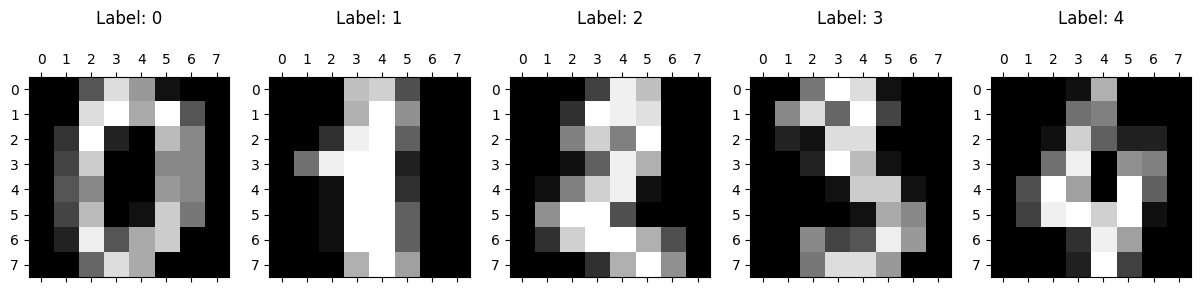

In [3]:
rows = 1 
columns = 5 
fig, ax = plt.subplots(rows, columns, figsize=(15,6))

plt.gray()
for i in range(columns):
    ax[i].matshow(digits_df.images[i])
    ax[i].set_title('Label: %s\n' % digits_df.target[i])

## Creazione del dataset di esempi X e del vettore di etichette y

In [4]:
X = digits_df.data / 16
y = digits_df.target

## Suddivisione in dataset di addestramento e di test

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state=1)

## Modello di regressione logistica

In [6]:
lm = linear_model.LogisticRegression(max_iter=15000)
lm.fit(X_train, y_train)

LogisticRegression(max_iter=15000)

## Testing del modello

In [7]:
id = 75
print('Valore predetto: ', lm.predict([X_test[id]]))
print('il valore del dataset di test e %s' % (y_test[id]))

Valore predetto:  [4]
il valore del dataset di test e 4


## Valutazione del modello

In [8]:
lm.score(X_test, y_test)

0.9805555555555555

## Matrice di confusione

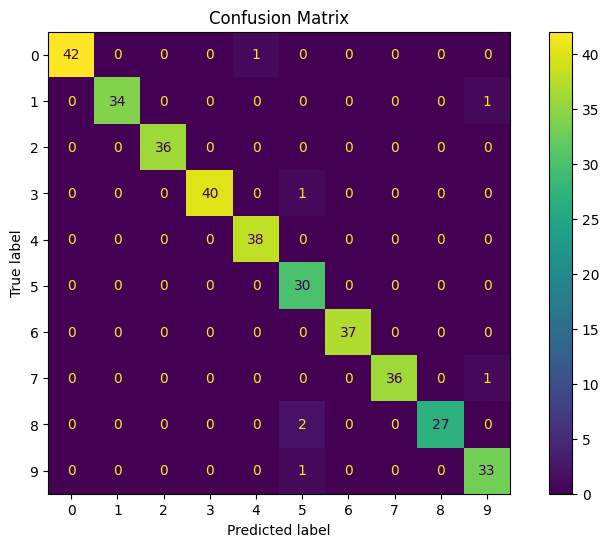

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
y_pred = lm.predict(X_test)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, ax=ax)
